# A Network Tour of Data Science

[Michaël Defferrard](http://deff.ch), *PhD student*, [Pierre Vandergheynst](https://people.epfl.ch/pierre.vandergheynst), *Full Professor*, [EPFL](http://epfl.ch) [LTS2](http://lts2.epfl.ch).

# Assignment 4: Transductive Learning using Graphs

Transduction is reasoning from observed, specific (training) cases to specific (test) cases. For this assignment, the task is to infer missing values in some dataset, while the training and testing cases are available to construct a graph. The exercise consists of two parts: (1) construct some artificial data and (2) retrieve the missing values and measure performance.

## 1 Smooth graph signal

Let $\mathcal{G} = (\mathcal{V}, W)$ be a graph of vertex set $\mathcal{V}$ and weighted adjacency matrix $W$.

N = |V| = 100, k|V| < |E| = 1170


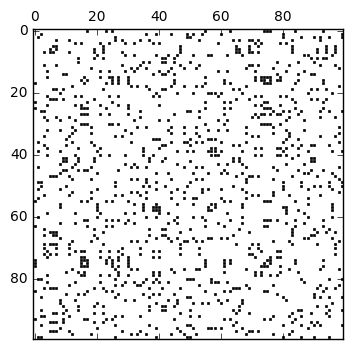

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import os.path

X = scipy.io.mmread(os.path.join('datasets', 'graph_inpainting', 'embedding.mtx'))
W = scipy.io.mmread(os.path.join('datasets', 'graph_inpainting', 'graph.mtx'))
N = W.shape[0]

print('N = |V| = {}, k|V| < |E| = {}'.format(N, W.nnz))
plt.spy(W, markersize=2, color='black');

Design a technique to construct smooth scalar signals $x \in \mathbb{R}^N$ over the graph $\mathcal{G}$.

Hint:
* This part is related to our [last exercise](07_ex_graph_fourier.ipynb).
* There is multiple ways to do this, another is to filter random signals.

M = x^T L x = 0.08185029995510494


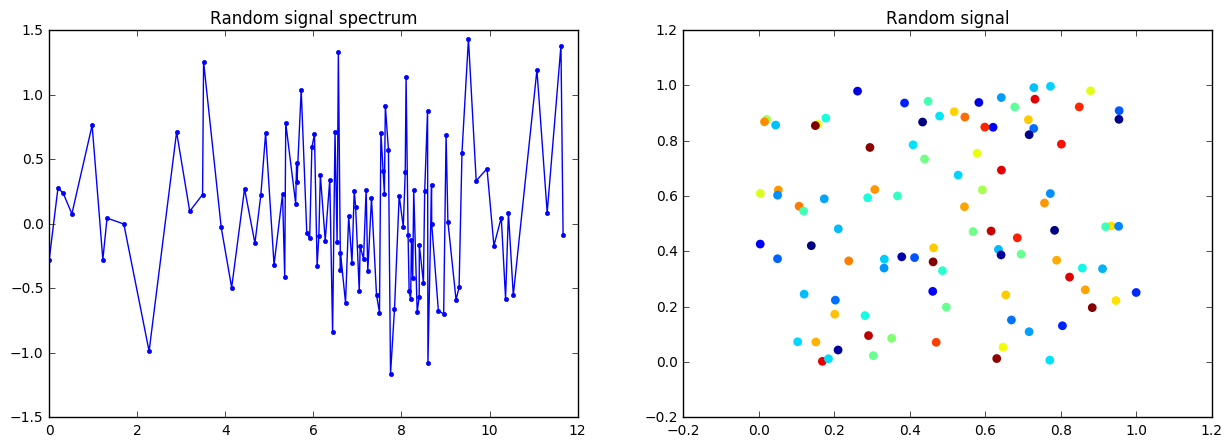

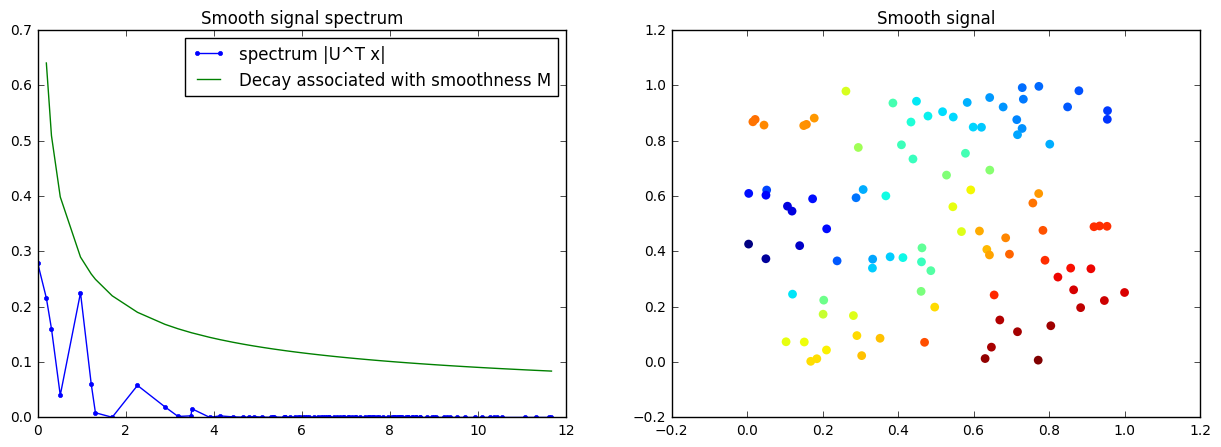

In [2]:
# Fourier basis.
D = YOUR CODE
L = YOUR CODE
lamb, U = YOUR CODE

# Low-pass filters.
def f(u):
    YOUR CODE

# Random signal.
x = YOUR CODE
xhat = YOUR CODE

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(lamb, xhat, '.-')
ax[0].set_title('Random signal spectrum')
ax[1].scatter(X[:, 0], X[:, 1], c=x, s=40, linewidths=0)
ax[1].set_title('Random signal')

# Smooth signal through filtering.
xhat *= YOUR CODE
x = YOUR CODE

M = x.T.dot(L.dot(x))
print('M = x^T L x = {}'.format(M))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Smooth signal spectrum')
ax[0].plot(lamb, abs(xhat), '.-', label='spectrum |U^T x|')
#ax[0].plot(lamb, np.sqrt(M/lamb))
ax[0].plot(lamb[1:], np.sqrt(M/lamb[1:]), label='Decay associated with smoothness M')
ax[0].legend()
ax[1].scatter(X[:, 0], X[:, 1], c=x, s=40, linewidths=0)
ax[1].set_title('Smooth signal');

## 2 Graph Signal Inpainting

Let $y$ be a signal obtained by observing $n$ out the $N$ entries of a smooth signal $x$. Design and implement a procedure to infer the missing values and test its average accuracy $\| x^\ast - x \|_2^2$ as a function of $n/N$ on a test set of signals created using the technique developed above.

First complete the equations below, then do the implementation.

Observation:
$$y = \text{COMPLETE}$$

Optimization problem:
$$x^\ast = \operatorname{arg } \min_x \text{COMPLETE}$$

Optimal solution (by putting the derivative to zero):
$$x^\ast = \text{COMPLETE}$$

Hint: in the end the solution should be a linear system of equations, to be solved with `np.linalg.solve()`.

|x-y|_2^2 = 0.969420
|x-x*|_2^2 = 0.044414


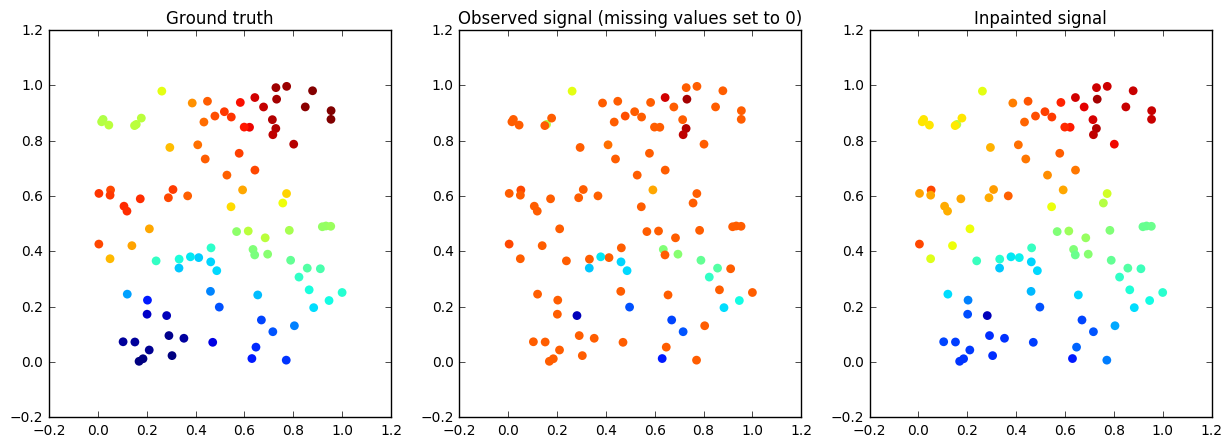

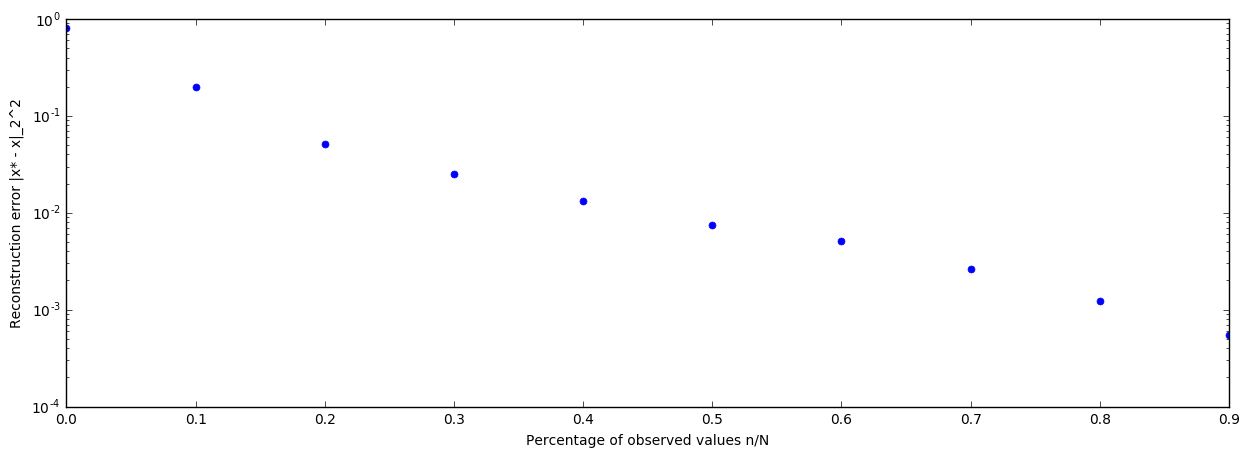

In [3]:
tau = 1e5  # Balance between fidelity and smoothness prior.
num = 100  # Number of signals and masks to generate.

# Percentage of values to keep.
probs = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0, 0.1, 0.2, 0.3]

errors = []
for p in probs:
    mse = 0
    for _ in range(num):
        # Smooth signal.
        x = YOUR CODE

        # Observation.
        y = YOUR CODE

        # Reconstruction.
        x_sol = np.linalg.solve(YOUR CODE)
        mse += np.linalg.norm(x - x_sol)**2
    errors.append(mse / num)

# Show one example.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
param = dict(s=40, vmin=min(x), vmax=max(x), linewidths=0)
ax[0].scatter(X[:, 0], X[:, 1], c=x, **param)
ax[1].scatter(X[:, 0], X[:, 1], c=y, **param)
ax[2].scatter(X[:, 0], X[:, 1], c=x_sol, **param)
ax[0].set_title('Ground truth')
ax[1].set_title('Observed signal (missing values set to 0)')
ax[2].set_title('Inpainted signal')

print('|x-y|_2^2 = {:5f}'.format(np.linalg.norm(x - y)**2))
print('|x-x*|_2^2 = {:5f}'.format(np.linalg.norm(x - x_sol)**2))

# Show reconstruction error w.r.t. percentage of observed values.
plt.figure(figsize=(15, 5))
plt.semilogy(probs, errors, '.', markersize=10)
plt.xlabel('Percentage of observed values n/N')
plt.ylabel('Reconstruction error |x* - x|_2^2');